In [ ]:
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [57]:
Tdata = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [58]:
Tdata.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [59]:
Tdata.tail()

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
7038          Yes               Yes             DSL            Yes  ...   
7039          Yes               Yes     Fiber optic             No  ...   
7040           No  No phone service             DSL            Yes  ...   
7041          Yes               Yes     Fiber optic             No  ...   
7042          Yes                No     Fiber optic            Yes  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
7038              Yes         Yes         Yes             Yes        One year   
7039              Yes          No         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   
7041               No          No          No              No  Month-to-month   
7042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
7038              Yes               Mailed check          84.80        1990.5   
7039              Yes    Credit card (automatic)         103.20        7362.9   
7040              Yes           Electronic check          29.60        346.45   
7041              Yes               Mailed check          74.40         306.6   
7042              Yes  Bank transfer (automatic)         105.65        6844.5   

     Churn  
7038    No  
7039    No  
7040    No  
7041   Yes  
7042    No  

[5 rows x 21 columns]

In [60]:
Tdata.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
# Converting TotalCharges to Numerical value

In [61]:
Tdata["TotalCharges"] = pd.to_numeric(Tdata["TotalCharges"],errors='coerce')

In [62]:
Tdata.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [9]:
# As we can see that TotalCharges is ratio of the 

In [63]:
Tdata.loc[Tdata["TotalCharges"].isnull() == True]

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
488   4472-LVYGI  Female              0     Yes        Yes       0   
753   3115-CZMZD    Male              0      No        Yes       0   
936   5709-LVOEQ  Female              0     Yes        Yes       0   
1082  4367-NUYAO    Male              0     Yes        Yes       0   
1340  1371-DWPAZ  Female              0     Yes        Yes       0   
3331  7644-OMVMY    Male              0     Yes        Yes       0   
3826  3213-VVOLG    Male              0     Yes        Yes       0   
4380  2520-SGTTA  Female              0     Yes        Yes       0   
5218  2923-ARZLG    Male              0     Yes        Yes       0   
6670  4075-WKNIU  Female              0     Yes        Yes       0   
6754  2775-SEFEE    Male              0      No        Yes       0   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
488            No  No phone service             DSL                  Yes  ...   
753           Yes                No              No  No internet service  ...   
936           Yes                No             DSL                  Yes  ...   
1082          Yes               Yes              No  No internet service  ...   
1340           No  No phone service             DSL                  Yes  ...   
3331          Yes                No              No  No internet service  ...   
3826          Yes               Yes              No  No internet service  ...   
4380          Yes                No              No  No internet service  ...   
5218          Yes                No              No  No internet service  ...   
6670          Yes               Yes             DSL                   No  ...   
6754          Yes               Yes             DSL                  Yes  ...   

         DeviceProtection          TechSupport          StreamingTV  \
488                   Yes                  Yes                  Yes   
753   No internet service  No internet service  No internet service   
936                   Yes                   No                  Yes   
1082  No internet service  No internet service  No internet service   
1340                  Yes                  Yes                  Yes   
3331  No internet service  No internet service  No internet service   
3826  No internet service  No internet service  No internet service   
4380  No internet service  No internet service  No internet service   
5218  No internet service  No internet service  No internet service   
6670                  Yes                  Yes                  Yes   
6754                   No                  Yes                   No   

          StreamingMovies  Contract PaperlessBilling  \
488                    No  Two year              Yes   
753   No internet service  Two year               No   
936                   Yes  Two year               No   
1082  No internet service  Two year               No   
1340                   No  Two year               No   
3331  No internet service  Two year               No   
3826  No internet service  Two year               No   
4380  No internet service  Two year               No   
5218  No internet service  One year              Yes   
6670                   No  Two year               No   
6754                   No  Two year              Yes   

                  PaymentMethod MonthlyCharges  TotalCharges  Churn  
488   Bank transfer (automatic)          52.55           NaN     No  
753                Mailed check          20.25           NaN     No  
936                Mailed check          80.85           NaN     No  
1082               Mailed check          25.75           NaN     No  
1340    Credit card (automatic)          56.05           NaN     No  
3331               Mailed check          19.85           NaN     No  
3826               Mailed check          25.35           NaN     No  
4380               Mailed check          20.00           NaN     No  
5218               Mailed check     

In [64]:
Tdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [12]:
# As we can see that Null value to is .15% then we are simple drop the null value

In [65]:
Tdata.dropna(how="any",inplace=True)

In [66]:
Tdata.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [69]:
100*Tdata["Churn"].value_counts()/len(Tdata["Churn"])

No     73.421502
Yes    26.578498
Name: Churn, dtype: float64

In [16]:
# Data is highly inbalanced,ratio = 73:27
# so we analyse the data with other feature while taking the target values separatly to get some insights

In [70]:
Tdata["Churn"].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

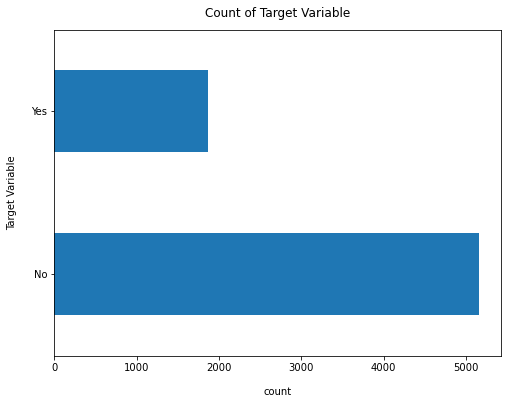

In [71]:
Tdata["Churn"].value_counts().plot(kind="barh",figsize=(8,6))
plt.xlabel("count",labelpad=14)
plt.ylabel("Target Variable",labelpad=14)
plt.title("Count of Target Variable",y=1.02);

Text(0.5, 1.02, 'Count of Target Variable per category')

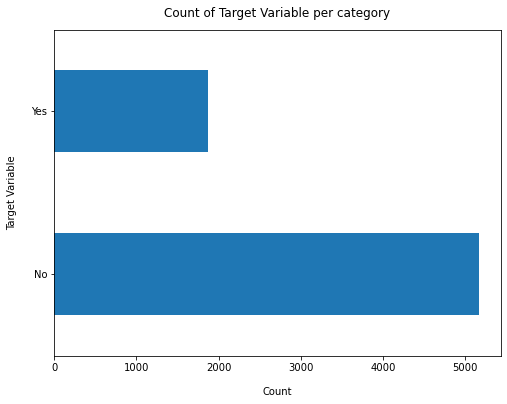

In [39]:
Tdata["Churn"].value_counts().plot(kind="barh",figsize=(8,6))
plt.xlabel("Count",labelpad=14)
plt.ylabel("Target Variable",labelpad=14)
plt.title("Count of Target Variable per category",y=1.02)

In [33]:
Tdata.describe()

SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7043.000000  7043.000000     7043.000000   7032.000000
mean        0.162147    32.371149       64.761692   2283.300441
std         0.368612    24.559481       30.090047   2266.771362
min         0.000000     0.000000       18.250000     18.800000
25%         0.000000     9.000000       35.500000    401.450000
50%         0.000000    29.000000       70.350000   1397.475000
75%         0.000000    55.000000       89.850000   3794.737500
max         1.000000    72.000000      118.750000   8684.800000

In [34]:
Tdata

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1             Yes                No             DSL            Yes  ...   
2             Yes                No             DSL            Yes  ...   
3              No  No phone service             DSL            Yes  ...   
4             Yes                No     Fiber optic             No  ...   
...           ...               ...             ...            ...  ...   
7038          Yes               Yes             DSL            Yes  ...   
7039          Yes               Yes     Fiber optic             No  ...   
7040           No  No phone service             DSL            Yes  ...   
7041          Yes               Yes     Fiber optic             No  ...   
7042          Yes                No     Fiber optic            Yes  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No          No          No              No  Month-to-month   
1                 Yes          No          No              No        One year   
2                  No          No          No              No  Month-to-month   
3                 Yes         Yes          No              No        One year   
4                  No          No          No              No  Month-to-month   
...               ...         ...         ...             ...             ...   
7038              Yes         Yes         Yes             Yes        One year   
7039              Yes          No         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   
7041               No          No          No              No  Month-to-month   
7042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
0                 Yes           Electronic check          29.85         29.85   
1                  No               Mailed check          56.95       1889.50   
2                 Yes               Mailed check          53.85        108.15   
3                  No  Bank transfer (automatic)          42.30       1840.75   
4                 Yes           Electronic check          70.70        151.65   
...               ...                        ...            ...           ...   
7038              Yes               Mailed check          84.80       1990.50   
7039              Yes    Credit card (automatic)         103.20       7362.90   
7040              Yes           Electronic check          29.60        346.45   
7041              Yes               Mailed check          74.40        306.60   
7042              Yes  Bank transfer (automatic)         105.65       6844.50   

      Churn  
0        No  
1        No  
2       Yes  
3        No  
4       Yes  
...     ...  
7038     No  
7039     No  
7040     No  
7041    Yes  
7042     No  

[7043 rows x 21 columns]

In [ ]:
for i,Predicator in enumerate(Tdata.drop(columns=["MonthlyCharges","TotalCharges"],axis=1)):
    plt.figure(i)
    sns.countplot(x=Predicator,hue="Churn",data=Tdata)

In [41]:
Tdata["tenure"].max()

72

In [42]:
labels = ["{0} - {1}".format(i,i+11) for i in range(1,72,12)]

Tdata["tenure"] = pd.cut(Tdata.tenure,range(1,80,12),right=False,labels=labels)

In [43]:
Tdata["Churn"] = np.where(Tdata.Churn == "Yes",1,0)

In [44]:
Tdata["Churn"] = np.where(Tdata.Churn == "Yes",1,0)

In [45]:
Tdata["Churn"] = np.where(Tdata.Churn == "Yes",1,0)

In [46]:
Tdata_dummies = pd.get_dummies(Tdata)
Tdata_dummies.head()

SeniorCitizen  MonthlyCharges  Churn  customerID_0002-ORFBO  \
0              0           29.85      0                      0   
1              0           56.95      0                      0   
2              0           53.85      0                      0   
3              0           42.30      0                      0   
4              0           70.70      0                      0   

   customerID_0003-MKNFE  customerID_0004-TLHLJ  customerID_0011-IGKFF  \
0                      0                      0                      0   
1                      0                      0                      0   
2                      0                      0                      0   
3                      0                      0                      0   
4                      0                      0                      0   

   customerID_0013-EXCHZ  customerID_0013-MHZWF  customerID_0013-SMEOE  ...  \
0                      0                      0                      0  ...   
1                      0                      0                      0  ...   
2                      0                      0                      0  ...   
3                      0                      0                      0  ...   
4                      0                      0                      0  ...   

   TotalCharges_995.35  TotalCharges_996.45  TotalCharges_996.85  \
0                    0                    0                    0   
1                    0                    0                    0   
2                    0                    0                    0   
3                    0                    0                    0   
4                    0                    0                    0   

   TotalCharges_996.95  TotalCharges_997.65  TotalCharges_997.75  \
0                    0                    0                    0   
1                    0                    0                    0   
2                    0                    0                    0   
3                    0                    0                    0   
4                    0                    0                    0   

   TotalCharges_998.1  TotalCharges_999.45  TotalCharges_999.8  \
0                   0                    0                   0   
1                   0                    0                   0   
2                   0                    0                   0   
3                   0                    0                   0   
4                   0                    0                   0   

   TotalCharges_999.9  
0                   0  
1                   0  
2                   0  
3                   0  
4                   0  

[5 rows x 13624 columns]

In [72]:
sns.lmplot(data=Tdata_dummies,x="MonthlyCharges",y="TotalCharges")

KeyError: "['TotalCharges'] not in index"

In [ ]:
Mth = sns.kdeplot(Tdata_dummies.MonthlyCharges[(Tdata_dummies["Churn"] == 0) ],
           color="Red",shade=True)
Mth = sns.kdeplot(Tdata_dummies.MonthlyCharges[(Tdata_dummies["Churn"] == 1) ],
                 ax=Mth,color="Blue",shade=True)
Mth.legend(["No Churn","Churn"],loc="upper right")

In [ ]:
plt.figure(figsize=(20,8))
Tdata_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

In [ ]:
plt.figure(figsize=(20,8))
telco_data_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

In [ ]:
Tdata.corr().style.background_gradient(cmap="coolwarm")

# Bivariate Analysis

In [73]:
new_df_target = Tdata.loc[Tdata["Churn"]==0]
new_df_target1 = Tdata.loc[Tdata["Churn"]==1]

In [75]:
def uniplot(df,col,title,hue =None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='bright') 
        
    plt.show()

In [ ]:
uniplot(new_df_target1,col='Partner',title='Distribution of Gender for Churned Customers',hue='gender')

In [ ]:
uniplot(new_df1_target0,col='Partner',title='Distribution of Gender for Non Churned Customers',hue='gender')

In [ ]:
uniplot(new_df1_target1,col='PaymentMethod',title='Distribution of PaymentMethod for Churned Customers',hue='gender')

In [ ]:
uniplot(new_df1_target1,col='Contract',title='Distribution of Contract for Churned Customers',hue='gender')

In [ ]:
uniplot(new_df1_target1,col='TechSupport',title='Distribution of TechSupport for Churned Customers',hue='gender')

In [ ]:
uniplot(new_df1_target1,col='SeniorCitizen',title='Distribution of SeniorCitizen for Churned Customers',hue='gender')

## Finding from this data

In [17]:
# Insights from this data


#1. Electronic check medium are the highest churners
#2. Contract Type - Monthly customers are more likely to churn because of no contract terms, as they are free to go customers.
#3. No Online security, No Tech Support category are high churners
#4. Non senior Citizens are high churners

# Model Building by using Decision Tree classifier

In [51]:
# Dividing the data into training and test set

from sklearn.model_selection import train_test_split
X = Tdata_dummies.drop(['Churn'],axis=1)
y = Tdata_dummies["Churn"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
X_train

In [ ]:
print("The number of Samples in train data is {}.".format(X_train.shape[0]))
print("The number of Samples in test data is {}.".format(X_test.shape[1]))

### Decision Tree classifier

In [76]:
from sklearn.tree import DecisionTreeClassifier

In [77]:
model_dt = DecisionTreeClassifier(criterion="gini",random_state= 100,max_depth=6,min_samples_leaf=8)

In [78]:
model_dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [ ]:
y_predict = model_dt.predict(X_test)
y_predict

In [116]:
model_dt.score(X_test,y_test)

0.7924662402274343

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [122]:
print(classification_report(y_test,y_predict,labels=[0,1]))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1030
           1       0.63      0.55      0.59       377

    accuracy                           0.79      1407
   macro avg       0.74      0.72      0.72      1407
weighted avg       0.79      0.79      0.79      1407



### Now we are going to use the Logistic Regression

In [48]:
from sklearn.linear_model import LogisticRegression

In [49]:
logistic_model= LogisticRegression()

In [54]:
logistic_model.fit(X_train,y_train)

ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0

In [55]:
accuracy = logistic_model.score(X_test,y_test)
print("Logistic Regression accuracy:",accuracy*100)

AttributeError: 'LogisticRegression' object has no attribute 'coef_'

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = logistic_model.predict(X_test)
cm_lr = confusion_matrix(y_test,y_pred)

print(cm_lr)